<a href="https://colab.research.google.com/github/AbhilashDatta/Customer_Attrition_Prediction/blob/main/Customer_Attrition_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
!git clone https://github.com/AbhilashDatta/Customer_Attrition_Prediction.git
%cd Customer_Attrition_Prediction/

Cloning into 'Customer_Attrition_Prediction'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.
/content/Customer_Attrition_Prediction/Customer_Attrition_Prediction/Customer_Attrition_Prediction/Customer_Attrition_Prediction


In [131]:
import pandas as pd
import numpy as np

In [132]:
train_df = pd.read_csv('train.csv', sep=',') 
test_x = pd.read_csv('test.csv', sep=',') 

In [133]:
print(train_df.head())
print(test_x.head())

                     ID     sex  ... GrandPayment CustomerAttrition
0  B60LHTZLLPFU4IULNPUF  Female  ...  4628.129119               Yes
1  1RUJ7ONYZHYTWKOKO1SD    Male  ...   922.085998                No
2  DZ9EEOQWSN0MYCBUPAM5    Male  ...  6205.891129               Yes
3  YZ43L1UQUQACTL1PXXZG    Male  ...  1248.655391                No
4  6P28152QGF60PDLSCB9M  Female  ...  1285.321277                No

[5 rows x 16 columns]
                     ID     sex  ... QuarterlyPayment GrandPayment
0  WMORTPCG3HTIPEFSGUFY    Male  ...        21.299937   151.092519
1  GBLPEA16C3KGBO57KEFO  Female  ...        56.609623  1553.276979
2  IDCQS0CO5P29AMKY3LO1    Male  ...        25.167690  1684.262416
3  1IY29SDITYU6IFZ4KJB0  Female  ...        55.560968  1829.874462
4  T5XMW5B0YPCONH30WJD2  Female  ...        20.070002   489.818170

[5 rows x 15 columns]


In [134]:
train_df.info()
test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   6338 non-null   object 
 1   sex                  6338 non-null   object 
 2   Aged                 6338 non-null   object 
 3   Married              6338 non-null   object 
 4   TotalDependents      6338 non-null   object 
 5   ServiceSpan          6338 non-null   int64  
 6   MobileService        6338 non-null   object 
 7   4GService            6338 non-null   object 
 8   CyberProtection      6338 non-null   object 
 9   HardwareSupport      6338 non-null   object 
 10  TechnicalAssistance  6338 non-null   object 
 11  FilmSubscription     6338 non-null   object 
 12  SettlementProcess    6338 non-null   object 
 13  QuarterlyPayment     6338 non-null   float64
 14  GrandPayment         6328 non-null   float64
 15  CustomerAttrition    6338 non-null   o

In [135]:
#Exploring categorical data
cat_col = []
for col_name in train_df.columns:
    if train_df[col_name].dtypes == 'object' and col_name!='ID' :
        cat_col.append(col_name)
        unique_cat = len(train_df[col_name].unique())
        print(f"feature '{col_name}' has {unique_cat} unique categories")

feature 'sex' has 2 unique categories
feature 'Aged' has 2 unique categories
feature 'Married' has 2 unique categories
feature 'TotalDependents' has 2 unique categories
feature 'MobileService' has 2 unique categories
feature '4GService' has 3 unique categories
feature 'CyberProtection' has 2 unique categories
feature 'HardwareSupport' has 2 unique categories
feature 'TechnicalAssistance' has 2 unique categories
feature 'FilmSubscription' has 2 unique categories
feature 'SettlementProcess' has 4 unique categories
feature 'CustomerAttrition' has 2 unique categories


In [136]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()

train_df.drop(columns='ID',inplace=True)
test_x.drop(columns='ID',inplace=True)

for col in cat_col:
  train_df[col] = le.fit_transform(train_df[col])  
  if col!='CustomerAttrition':
    test_x[col] = le.fit_transform(test_x[col])

In [137]:
train_df.info()
test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  6338 non-null   int64  
 1   Aged                 6338 non-null   int64  
 2   Married              6338 non-null   int64  
 3   TotalDependents      6338 non-null   int64  
 4   ServiceSpan          6338 non-null   int64  
 5   MobileService        6338 non-null   int64  
 6   4GService            6338 non-null   int64  
 7   CyberProtection      6338 non-null   int64  
 8   HardwareSupport      6338 non-null   int64  
 9   TechnicalAssistance  6338 non-null   int64  
 10  FilmSubscription     6338 non-null   int64  
 11  SettlementProcess    6338 non-null   int64  
 12  QuarterlyPayment     6338 non-null   float64
 13  GrandPayment         6328 non-null   float64
 14  CustomerAttrition    6338 non-null   int64  
dtypes: float64(2), int64(13)
memory usage:

In [138]:
# Handling NULL

train_df['GrandPayment'] = train_df['GrandPayment'].fillna(value = np.mean(train_df['GrandPayment']))

test_x['GrandPayment'] = test_x['GrandPayment'].fillna(value = np.mean(test_x['GrandPayment']))

train_df.info()
test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  6338 non-null   int64  
 1   Aged                 6338 non-null   int64  
 2   Married              6338 non-null   int64  
 3   TotalDependents      6338 non-null   int64  
 4   ServiceSpan          6338 non-null   int64  
 5   MobileService        6338 non-null   int64  
 6   4GService            6338 non-null   int64  
 7   CyberProtection      6338 non-null   int64  
 8   HardwareSupport      6338 non-null   int64  
 9   TechnicalAssistance  6338 non-null   int64  
 10  FilmSubscription     6338 non-null   int64  
 11  SettlementProcess    6338 non-null   int64  
 12  QuarterlyPayment     6338 non-null   float64
 13  GrandPayment         6338 non-null   float64
 14  CustomerAttrition    6338 non-null   int64  
dtypes: float64(2), int64(13)
memory usage:

In [139]:
y = pd.get_dummies(train_x['4GService'])
z = pd.get_dummies(train_x['SettlementProcess'])

train_x['4G0'] = y[0]
#train_x['4G1'] = y[1]
train_x['4G2'] = y[2]

train_x['Set0'] = z[0]
train_x['Set1'] = z[1]
train_x['Set2'] = z[2]
train_x['Set3'] = z[3]

train_x.drop(columns=['4GService','SettlementProcess'],inplace=True)

In [140]:
y = pd.get_dummies(test_x['4GService'])
z = pd.get_dummies(test_x['SettlementProcess'])

test_x['4G0'] = y[0]
#test_x['4G1'] = y[1]
test_x['4G2'] = y[2]

test_x['Set0'] = z[0]
test_x['Set1'] = z[1]
test_x['Set2'] = z[2]
test_x['Set3'] = z[3]

test_x.drop(columns=['4GService','SettlementProcess'],inplace=True)

In [141]:
#dropping due to high magnitude of correlation

train_df.drop(columns=['ServiceSpan'],inplace = True)
test_x.drop(columns=['ServiceSpan'],inplace = True)


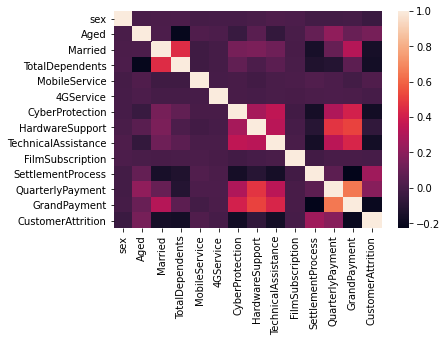

In [142]:
import seaborn as sns
sns.heatmap(train_df.corr())

In [143]:
train_x = train_df.drop(columns='CustomerAttrition')
train_y = train_df['CustomerAttrition']

In [144]:
train_x.shape

(6338, 13)

In [145]:
!pip install imblearn
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
train_x, train_y = oversample.fit_resample(train_x, train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


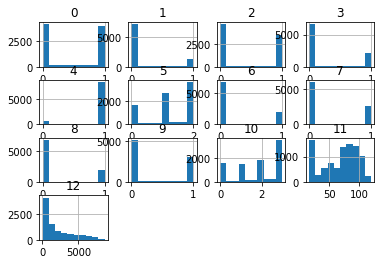

In [146]:
import matplotlib.pyplot as plt

pd.DataFrame(train_x).hist()
plt.show()

In [147]:
# #Standardization
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()

# train_x = sc.fit_transform(train_x)
# test_x = sc.fit_transform(test_x)

In [148]:
train_x.shape

(9316, 13)

In [149]:
from sklearn.model_selection import train_test_split

x_train,x_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.2, random_state=False, stratify = train_y)


In [150]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(n_estimators=600,random_state=0)
rfc.fit(x_train,y_train)

rfc_pred = rfc.predict(x_valid)
print(classification_report(y_valid,rfc_pred))
print("Random Forest Accuracy: ",accuracy_score(y_valid, rfc_pred, normalize=True, sample_weight=None))


              precision    recall  f1-score   support

           0       0.84      0.89      0.87       932
           1       0.88      0.83      0.86       932

    accuracy                           0.86      1864
   macro avg       0.86      0.86      0.86      1864
weighted avg       0.86      0.86      0.86      1864

Random Forest Accuracy:  0.8615879828326181


In [151]:
from sklearn.ensemble import AdaBoostClassifier
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

ada = AdaBoostClassifier(n_estimators=500)
ada.fit(x_train,y_train)
ada_pred = ada.predict(x_valid)

print(classification_report(y_valid,ada_pred))
print("AdaBoostClassifier Accuracy: ",accuracy_score(y_valid, ada_pred, normalize=True, sample_weight=None))


              precision    recall  f1-score   support

           0       0.84      0.89      0.86       932
           1       0.88      0.83      0.85       932

    accuracy                           0.86      1864
   macro avg       0.86      0.86      0.86      1864
weighted avg       0.86      0.86      0.86      1864

AdaBoostClassifier Accuracy:  0.8589055793991416


In [152]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

gb = GradientBoostingClassifier(n_estimators=350)
gb.fit(x_train,y_train)
gb_pred = gb.predict(x_valid)

print(classification_report(y_valid,gb_pred))
print("GradientBoostingClassifier Accuracy: ",accuracy_score(y_valid, gb_pred, normalize=True, sample_weight=None))


              precision    recall  f1-score   support

           0       0.84      0.88      0.86       932
           1       0.87      0.84      0.86       932

    accuracy                           0.86      1864
   macro avg       0.86      0.86      0.86      1864
weighted avg       0.86      0.86      0.86      1864

GradientBoostingClassifier Accuracy:  0.8589055793991416


In [153]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(5)
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_valid)

print(classification_report(y_valid,knn_pred))
print("KNeighborsClassifier Accuracy: ",accuracy_score(y_valid, knn_pred, normalize=True, sample_weight=None))


              precision    recall  f1-score   support

           0       0.82      0.69      0.75       932
           1       0.73      0.85      0.79       932

    accuracy                           0.77      1864
   macro avg       0.78      0.77      0.77      1864
weighted avg       0.78      0.77      0.77      1864

KNeighborsClassifier Accuracy:  0.7719957081545065


In [154]:
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

etc = ExtraTreesClassifier(n_estimators=800)
etc.fit(x_train,y_train)
etc_pred = etc.predict(x_valid)

print(classification_report(y_valid,etc_pred))
print("ExtraTreesClassifier Accuracy: ",accuracy_score(y_valid, etc_pred, normalize=True, sample_weight=None))


              precision    recall  f1-score   support

           0       0.83      0.87      0.85       932
           1       0.87      0.82      0.84       932

    accuracy                           0.85      1864
   macro avg       0.85      0.85      0.85      1864
weighted avg       0.85      0.85      0.85      1864

ExtraTreesClassifier Accuracy:  0.8454935622317596


In [155]:
!pip install catboost

from catboost import CatBoostClassifier

cbr = CatBoostClassifier(iterations=100,learning_rate=0.1,depth=2)

cbr_pred = cbr.fit(x_train,y_train).predict(x_valid)

print(classification_report(y_valid,cbr_pred))
print("CatBoostClassifier Accuracy: ",accuracy_score(y_valid, cbr_pred, normalize=True, sample_weight=None))


0:	learn: 0.6750581	total: 2.57ms	remaining: 254ms
1:	learn: 0.6589455	total: 5.51ms	remaining: 270ms
2:	learn: 0.6430745	total: 7.78ms	remaining: 251ms
3:	learn: 0.6309789	total: 10.5ms	remaining: 252ms
4:	learn: 0.6198246	total: 12.8ms	remaining: 243ms
5:	learn: 0.6048004	total: 15.1ms	remaining: 236ms
6:	learn: 0.5918272	total: 18.2ms	remaining: 242ms
7:	learn: 0.5806569	total: 20.5ms	remaining: 236ms
8:	learn: 0.5703806	total: 22.7ms	remaining: 230ms
9:	learn: 0.5614595	total: 25.3ms	remaining: 227ms
10:	learn: 0.5546022	total: 27.6ms	remaining: 224ms
11:	learn: 0.5468158	total: 29.9ms	remaining: 219ms
12:	learn: 0.5390775	total: 32.2ms	remaining: 216ms
13:	learn: 0.5324643	total: 35.4ms	remaining: 218ms
14:	learn: 0.5258927	total: 38.1ms	remaining: 216ms
15:	learn: 0.5197253	total: 40.5ms	remaining: 212ms
16:	learn: 0.5147382	total: 42.8ms	remaining: 209ms
17:	learn: 0.5094574	total: 45ms	remaining: 205ms
18:	learn: 0.5030577	total: 47.3ms	remaining: 202ms
19:	learn: 0.4969173	tot

In [156]:
from xgboost.sklearn import XGBClassifier

xgb = XGBClassifier(random_state = 0,n_estimators=500,learning_rate=0.04)

xgb.fit(x_train,y_train)

y_pred3 = xgb.predict(x_valid)

from sklearn.metrics import accuracy_score

print("XGB Accuracy: ",100 * accuracy_score(y_valid, y_pred3, normalize=True, sample_weight=None))

XGB Accuracy:  86.85622317596567


In [157]:
y_pred3

array([1, 1, 1, ..., 0, 0, 0])

In [158]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=5)

y_pred11 = lgbm.fit(x_train,y_train).predict(x_valid)

print("Lightgbm: ",100 * accuracy_score(y_valid, y_pred11, normalize=True, sample_weight=None))

Lightgbm:  85.1931330472103


In [159]:
xgb.fit(train_x,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.04, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [161]:
test_x = np.array(test_x)
y_pred = xgb.predict(test_x)

In [162]:
y_pred


array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [163]:
preds = []
for i in y_pred:
  if i==1:
    preds.append('Yes')
  else:
    preds.append('No')


In [164]:
y = pd.DataFrame()
x = pd.read_csv('test.csv')
y['ID'] = x['ID']
y['CustomerAttrition'] = preds
y

,ID,CustomerAttrition
0,WMORTPCG3HTIPEFSGUFY,No
1,GBLPEA16C3KGBO57KEFO,No
2,IDCQS0CO5P29AMKY3LO1,No
3,1IY29SDITYU6IFZ4KJB0,No
4,T5XMW5B0YPCONH30WJD2,No
...,...,...
700,8M7JJ5JBQUIA0ORLJ1UU,No
701,WS1T1FLY87G9A1UNKST4,Yes
702,0XG96FS1KXZSULPSGA1X,Yes
703,YR858QHNQMCDBCT9JRP6,Yes


In [165]:
y.to_csv('/content/XGB.csv')

In [ ]:
x.shape